In [1]:
import h5py as h5;
import numpy as np;
import matplotlib.pyplot as plt;

In [4]:
def GetInfo( filename ):
    file = h5.File( filename )

def GetPSD( filename, channel, Navg=None, Nfft=None, ampere=True, info=False, downsample=1 ):

    file = h5.File( filename )
    
    if info is True:

        print('=======ROOT=======\n')
        for i in file.attrs.keys():
            print( i + ':\t' + str( file.attrs[i] ) )

        print('\n=======adc1=======\n')
        for i in file['adc1'].attrs.keys():
            print( i + ':\t' + str( file['adc1'].attrs[i] ) )

        print('\n=======detconfig1=======\n')
        for i in file['detconfig1'].attrs.keys():
            print( i + ':\t' + str( file['detconfig1'].attrs[i] ) )

    ch_indices = file['adc1'].attrs['adc_channel_indices']
    nb_samples = file['adc1'].attrs['nb_samples']
    nb_events = file['adc1'].attrs['nb_events']
    sample_rate = file['adc1'].attrs['sample_rate']
    cal = file['adc1'].attrs['adc_conversion_factor']
    Rfb = file['detconfig1'].attrs['Rfb']
    gain = file['detconfig1'].attrs['output_gain']
    
    if Nfft is None:
        Nfft = nb_samples
            # number of samples in the waveform to take into account.
    if Navg is None:
        Navg = nb_events

    t = np.linspace( 0, nb_samples/sample_rate, nb_samples)[:Nfft:downsample]
        # time points in second
    freq = np.fft.fftfreq( n=t.shape[-1], d=1./sample_rate)
    freq_bin = freq[1]-freq[0]

    #rows, cols = (ch_indices.shape[-1], Nfft)
    #V = [[0]*cols]*rows
    Vfreq = []

    counter = 0

    for evt_index in range( 1, Navg+1):
        
        #for ch_index in ch_indices:
        ch_index = channel
        cal_coeff = cal[ch_index][::-1]
        poly = np.poly1d( cal_coeff )

        #V[ch_index] = poly(file['adc1']['event_%d' % evt_index][ch_index][:Nfft])
            # measured voltages at above time points in Volt. 
        V = poly(file['adc1']['event_%d' % evt_index][ch_index][:Nfft:downsample])

        if evt_index==1:
            Vfreq = np.abs(np.fft.fft(V))**2
        else:
            Vfreq += np.abs(np.fft.fft(V))**2
        counter += 1

    Vfreq /= (counter*freq_bin)
        # divide by number of waveforms to get average. Also divide by Nsamples to normalize
        # Note that DFT is approximation to Fourier transform up to a factor of Nsample
    if ampere is True:
        return np.sqrt(Vfreq[:][freq>0])/Nfft/Rfb[ch_index]/gain[ch_index], freq[freq>0]
    else:
        return np.sqrt(Vfreq[:][freq>0])/Nfft, freq[freq>0]

In [11]:
Navg = None
downsample = 1

directory = '/sdata/leiden/'
name = directory+'TESNoise_I1_D20200708_T123159_F0001.hdf5'
V0, f = GetPSD(name, 0, Navg = Navg, info=False, ampere=True, downsample=downsample)
print('processed '+name)

name = directory+'TESNoiseTurboOff_I1_D20200708_T140713_F0001.hdf5'
V1, _ = GetPSD(name, 0, Navg = Navg, info=False, ampere=True, downsample=downsample)
print('processed '+name)

name = directory+'TESNoiseTurboOff_I1_D20200708_T142434_F0001.hdf5'
V2, _ = GetPSD(name, 0, Navg = Navg, info=False, ampere=True, downsample=downsample)
print('processed '+name)

name = directory+'TESNoiseTurboOff_I1_D20200708_T143951_F0001.hdf5'
V3, _ = GetPSD(name, 0, Navg = Navg, info=False, ampere=True, downsample=downsample)
print('processed '+name)

name = directory+'TESNoiseTurboOff_I1_D20200708_T145246_F0001.hdf5'
V4, _ = GetPSD(name, 0, Navg = Navg, info=False, ampere=True, downsample=downsample)
print('processed '+name)

name = directory+'TESNoiseTurboOff_I1_D20200708_T150447_F0001.hdf5'
V5, _ = GetPSD(name, 0, Navg = Navg, info=False, ampere=True, downsample=downsample)
print('processed '+name)

processed /sdata/leiden/TESNoise_I1_D20200708_T123159_F0001.hdf5
processed /sdata/leiden/TESNoiseTurboOff_I1_D20200708_T140713_F0001.hdf5
processed /sdata/leiden/TESNoiseTurboOff_I1_D20200708_T142434_F0001.hdf5
processed /sdata/leiden/TESNoiseTurboOff_I1_D20200708_T143951_F0001.hdf5
processed /sdata/leiden/TESNoiseTurboOff_I1_D20200708_T145246_F0001.hdf5
processed /sdata/leiden/TESNoiseTurboOff_I1_D20200708_T150447_F0001.hdf5


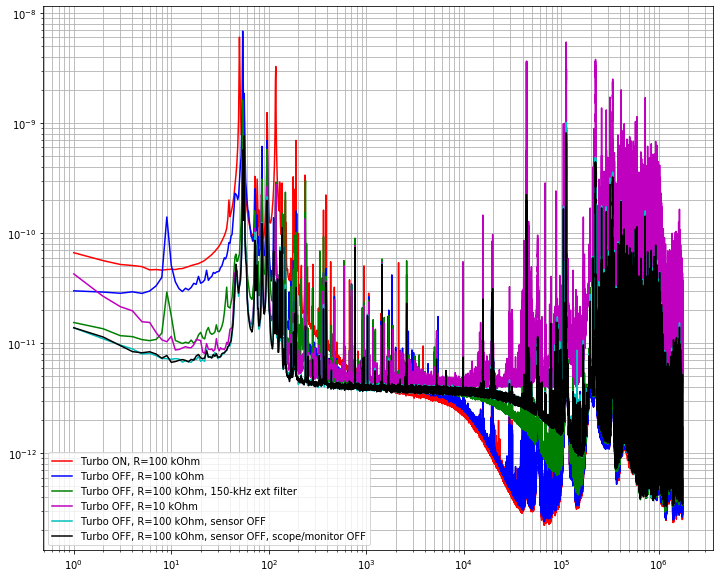

In [12]:
plt.figure(figsize=(12,10))
#plt.xlim(1,100000)

plt.plot(f,V0, 'r-', label='Turbo ON, R=100 kOhm')
plt.plot( f, V1, 'b-', label='Turbo OFF, R=100 kOhm')
plt.plot( f, V2, 'g-', label='Turbo OFF, R=100 kOhm, 150-kHz ext filter')
plt.plot( f, V3, 'm-', label='Turbo OFF, R=10 kOhm')
plt.plot( f, V4, 'c-', label='Turbo OFF, R=100 kOhm, sensor OFF')
plt.plot( f, V5, 'k-', label='Turbo OFF, R=100 kOhm, sensor OFF, scope/monitor OFF')

plt.semilogx()
plt.semilogy()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (A/sqrt(Hz))')
plt.grid(True, which='both', axis='both')
plt.legend()

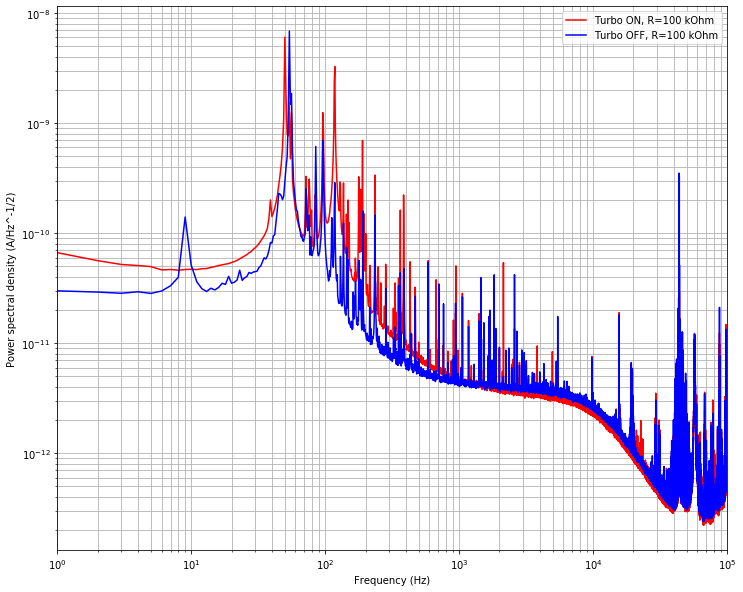

In [17]:
plt.figure(figsize=(12,10))
plt.xlim(1,100000)

plt.plot(f,V0, 'r-', label='Turbo ON, R=100 kOhm')
plt.plot( f, V1, 'b-', label='Turbo OFF, R=100 kOhm')

plt.semilogx()
plt.semilogy()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (A/Hz^-1/2)')
plt.grid(True, which='both', axis='both')
plt.legend()

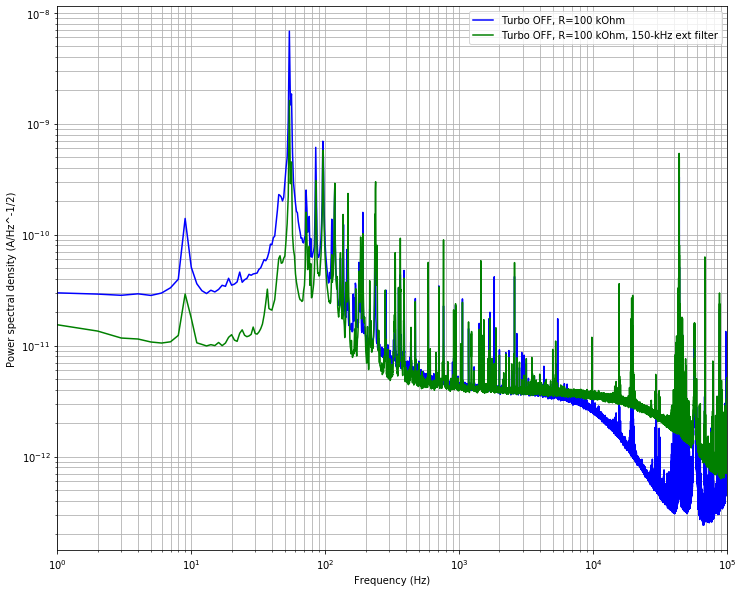

In [20]:
plt.figure(figsize=(12,10))
plt.xlim(1,100000)


#plt.plot(f,V0, 'r-', label='Turbo ON, R=100 kOhm')
plt.plot( f, V1, 'b-', label='Turbo OFF, R=100 kOhm')
plt.plot( f, V2, 'g-', label='Turbo OFF, R=100 kOhm, 150-kHz ext filter')

plt.semilogx()
plt.semilogy()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (A/Hz^-1/2)')
plt.grid(True, which='both', axis='both')
plt.legend()

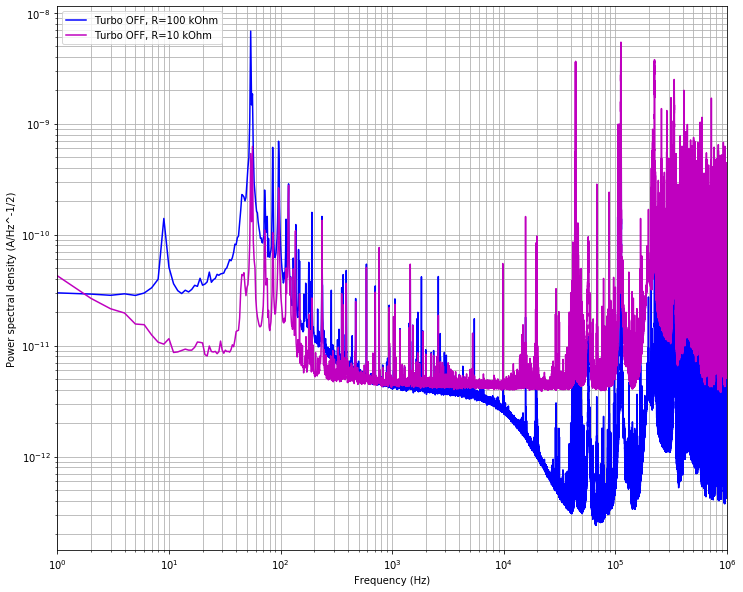

In [22]:
plt.figure(figsize=(12,10))
plt.xlim(1,1000000)

plt.plot( f, V1, 'b-', label='Turbo OFF, R=100 kOhm')
plt.plot( f, V3, 'm-', label='Turbo OFF, R=10 kOhm')

plt.semilogx()
plt.semilogy()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (A/Hz^-1/2)')
plt.grid(True, which='both', axis='both')
plt.legend()

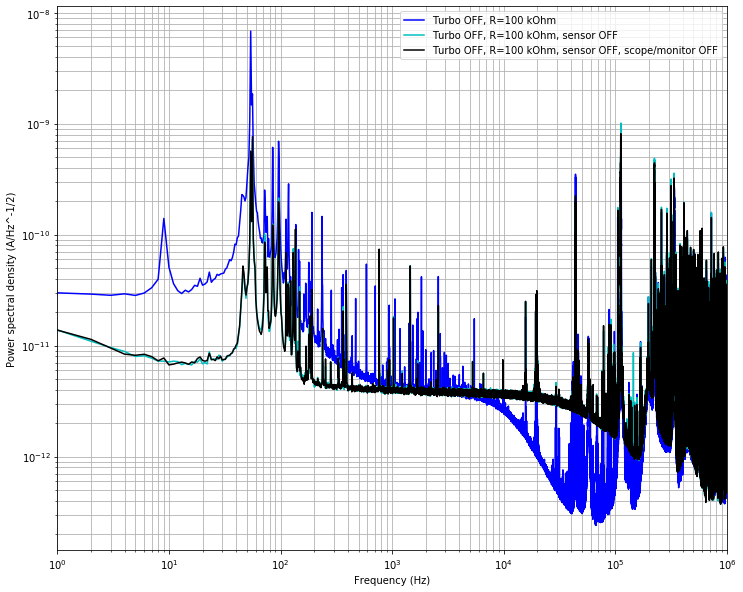

In [26]:
plt.figure(figsize=(12,10))
plt.xlim(1,1000000)


plt.plot( f, V1, 'b-', label='Turbo OFF, R=100 kOhm')
plt.plot( f, V4, 'c-', label='Turbo OFF, R=100 kOhm, sensor OFF')
plt.plot( f, V5, 'k-', label='Turbo OFF, R=100 kOhm, sensor OFF, scope/monitor OFF')

plt.semilogx()
plt.semilogy()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (A/Hz^-1/2)')
plt.grid(True, which='both', axis='both')
plt.legend()